In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [201]:
df=pd.read_csv("/content/Iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [202]:
Species=df['Species']
df.drop(['Id','Species'],axis=1,inplace =True)
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Visualizing the data

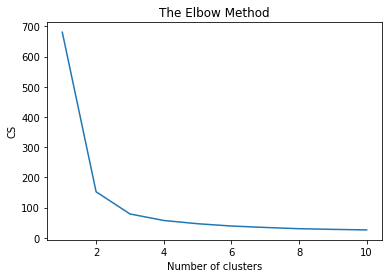

In [204]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.ylabel('CS')
plt.xlabel('Number of clusters')
plt.show()
# from the elbow plot we can see that the optimal number of clusters is 3

In [205]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0).fit(df)

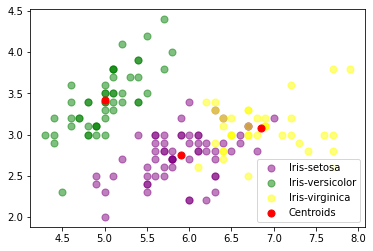

In [206]:
setosa = df[kmeans.labels_ == 0]
versicolor = df[kmeans.labels_ == 1]
virginica = df[kmeans.labels_ == 2]

# Get the centroids
centroids = kmeans.cluster_centers_

# Visualize the clusters and centroids
fig, ax = plt.subplots()
ax.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], c='purple', s=50, alpha=0.5, label='Iris-setosa')
ax.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], c='green', s=50, alpha=0.5, label='Iris-versicolor')
ax.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], c='yellow', s=50, alpha=0.5, label='Iris-virginica')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label='Centroids')
ax.legend()

In [213]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the species column and transform the labels to targets
Species = le.fit_transform(Species)
Species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [215]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(df)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(Species == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Species.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Species.size)))
#accuracy very low , clustering isn't the perfect model for this data

Result: 36 out of 150 samples were correctly labeled.
Accuracy score: 0.24


In [220]:
#making some predictions using the model
new_data = [[5.1, 3.5, 1.4, 0.2], [7.0, 3.2, 4.7, 1.4], [6.3, 3.3, 6.0, 2.5]]
label_to_species = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
predicted_species = kmeans.predict(new_data)
predicted_species_names = [label_to_species[label] for label in predicted_species]

predicted_species_names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']